In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

# Production

In [2]:
# reading the food production data set 
production = pd.read_csv(r'C:\Users\USER\Downloads\Africa Food Production (2004 - 2013).csv')

In [3]:
production.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [4]:
production.describe()

print('the number of food items produce in africa accross 45 countries is 94 from 2004 - 2013')

the number of food items produce in africa accross 45 countries is 94 from 2004 - 2013


In [5]:
# checking statistical value of our data set
production.describe()

,Year,Value
count,23110.000000,23110.000000
mean,2008.498269,327.785201
std,2.871740,1607.940343
min,2004.000000,0.000000
25%,2006.000000,3.000000
50%,2008.000000,18.000000
75%,2011.000000,108.000000
max,2013.000000,54000.000000


In [6]:
production.shape

(23110, 4)

In [7]:
production.dtypes

Country    object
Item       object
Year        int64
Value       int64
dtype: object

In [8]:
print('The Max value of production of food per person in each year:' )
print(production.groupby('Year').Value.max())

The Max value of production of food per person in each year:
Year
2004    38845
2005    41565
2006    45721
2007    43410
2008    44582
2009    36822
2010    42533
2011    52403
2012    54000
2013    53000
Name: Value, dtype: int64


# Supply 

In [9]:
consumption  = pd.read_csv(r'C:\Users\USER\Downloads\Africa Food Supply (2004 - 2013).csv')
consumption.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [10]:
consumption.describe()

,Year,Value
count,450.000000,450.000000
mean,2008.500000,2469.775556
std,2.875478,379.140143
min,2004.000000,1781.000000
25%,2006.000000,2174.000000
50%,2008.500000,2376.000000
75%,2011.000000,2681.750000
max,2013.000000,3561.000000


In [11]:
consumption.shape

(450, 3)

In [12]:
consumption.dtypes

Country    object
Year        int64
Value       int64
dtype: object

#  The mean value of production and Consumption

### Production

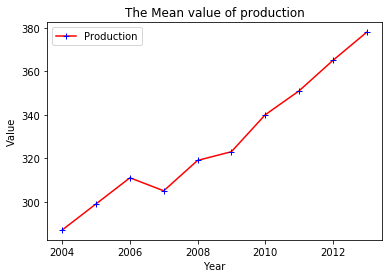

In [68]:
# The mean value of production in each year
mean  = pd.DataFrame(np.round(production.groupby(['Year'])['Value'].mean()))
mean.index.name = 'Year'
mean.reset_index(inplace = True)


x = mean['Year']
y = mean['Value']

plt.plot(x, y, label = 'Production', color='red', marker = '+', markeredgecolor = 'blue')
plt.title('The Mean value of production')

plt.xlabel('Year')
plt.ylabel('Value')

plt.legend()
plt.show()


# mean.Value.plot()
# con_mean.Value.plot()

# plt.xticks(mean['Year'])

### Consumption

,Year,Value
0,2004,2394.0
1,2005,2409.0
2,2006,2431.0
3,2007,2448.0
4,2008,2461.0


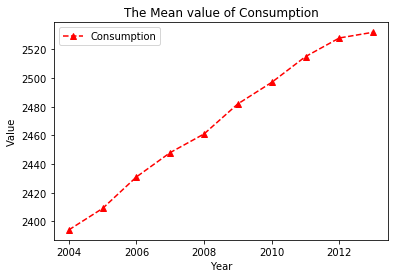

In [71]:
# The mean value of consumption in each Year
con_mean = pd.DataFrame(np.round(consumption.groupby(['Year'])['Value'].mean()))
con_mean.index.name = 'Year'
con_mean.reset_index(inplace = True)

x = con_mean['Year']
y = con_mean['Value']

# plt.plot(x, y, label = 'Consumption', color='green', marker = ^, markeredgecolor = 'red')
plt.plot(x, y,'r^--', label = 'Consumption')
plt.title('The Mean value of Consumption')

plt.xlabel('Year')
plt.ylabel('Value')

plt.legend()

# The Mean consumption and production 

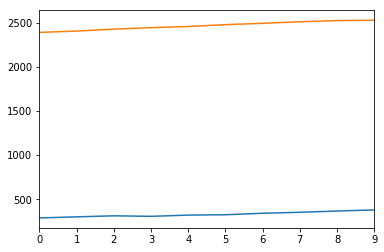

In [106]:
# The mean value of production in each year
mean  = pd.DataFrame(np.round(production.groupby(['Year'])['Value'].mean()))
mean.index.name = 'Year'
mean.reset_index(inplace = True)

con_mean = pd.DataFrame(np.round(consumption.groupby(['Year'])['Value'].mean()))
con_mean.index.name = 'Year'
con_mean.reset_index(inplace = True)


mean.Value.plot()
con_mean.Value.plot()

plt.show()

### From the analysis above; we can see that we consume more than we produce
### That means we rely more on imported food than the way we supply in Africa and our food consumption increases year by year from 2014 - 2013 

#  Maximum Value

In [11]:
# getting the mean value of production in Africa 
np.round(production.groupby(['Country'])['Value'].mean())

Country
Algeria                         325.0
Angola                          362.0
Benin                           149.0
Botswana                         14.0
Burkina Faso                    233.0
Cabo Verde                        5.0
Cameroon                        304.0
Central African Republic         55.0
Chad                            116.0
Congo                            52.0
Cote d'Ivoire                   285.0
Djibouti                          3.0
Egypt                          1254.0
Ethiopia                        584.0
Gabon                            34.0
Gambia                           13.0
Ghana                           509.0
Guinea                          134.0
Guinea-Bissau                    17.0
Kenya                           342.0
Lesotho                          16.0
Liberia                          35.0
Madagascar                      193.0
Malawi                          320.0
Mali                            192.0
Mauritania                       26.0
Maur

In [12]:
production.groupby(['Country', 'Year'])['Value'].sum().head()

Country  Year
Algeria  2004    15536
         2005    15667
         2006    16417
         2007    14763
         2008    13841
Name: Value, dtype: int64

# Year in which Item is most produced  and Consumed

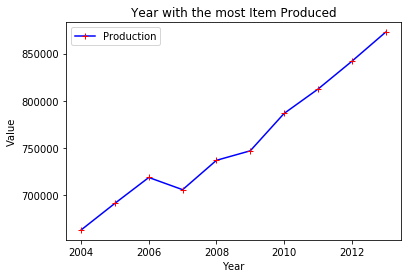

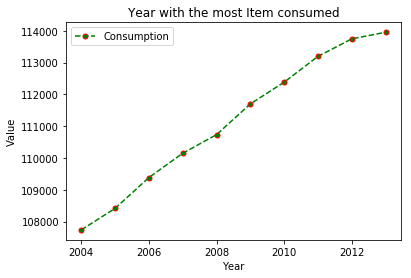

In [77]:
# The value of food we produce in Africa increases year by year
max_year = pd.DataFrame(production.groupby(['Year'])['Value'].sum())

max_year.index.name = 'Year'
max_year.reset_index(inplace = True)
max_year

x  = max_year['Year']
y = max_year['Value']

plt.plot(x, y, label = 'Production', color='blue', marker = '+', markeredgecolor = 'red')
plt.title('Year with the most Item Produced')

plt.xlabel('Year')
plt.ylabel('Value')

plt.legend()
plt.show()




con_max_year = pd.DataFrame(consumption.groupby(['Year'])['Value'].sum())

con_max_year.index.name = 'Year'
con_max_year.reset_index(inplace = True)

x  = con_max_year['Year']
y = con_max_year['Value']

plt.plot(x, y, label = 'Consumption', color='green', marker = '.', linestyle = '--', markersize = 10, markeredgecolor = 'red')
plt.title('Year with the most Item consumed')

plt.xlabel('Year')
plt.ylabel('Value')

plt.legend()
plt.show()

# Food Trend In Nigeria 

In [83]:
# Lets us know food trend in Nigeria 
nig_production =  production[(production['Country'] == 'Nigeria')]
nig_production.head()

,Country,Year,Value
310,Nigeria,2004,2655
311,Nigeria,2005,2705
312,Nigeria,2006,2725
313,Nigeria,2007,2720
314,Nigeria,2008,2723


In [84]:
nig_consumption =  consumption[(consumption['Country'] == 'Nigeria')]
nig_consumption.head()

,Country,Year,Value
310,Nigeria,2004,2655
311,Nigeria,2005,2705
312,Nigeria,2006,2725
313,Nigeria,2007,2720
314,Nigeria,2008,2723


In [15]:
nig_production.shape

(610, 4)

#  Year in which Item is most produced and consumed in Nigeria 

<BarContainer object of 10 artists>

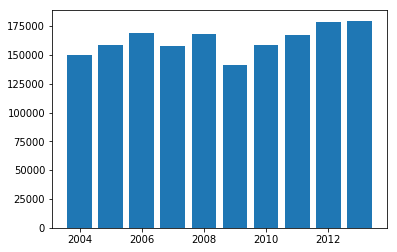

In [107]:
most_year_produced = pd.DataFrame(nig_production.groupby(['Year'])['Value'].sum())

most_year_produced.index.name = 'Year'
most_year_produced.reset_index(inplace = True)

x = most_year_produced['Year']
y = most_year_produced['Value']

plt.bar(x,y)

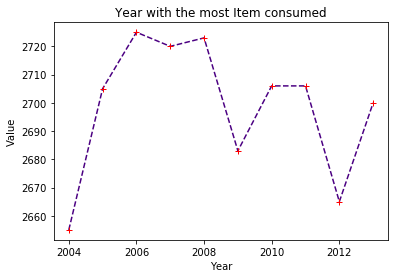

In [117]:
most_year_consumed = pd.DataFrame(nig_consumption.groupby(['Year'])['Value'].sum())
most_year_consumed.index.name = 'Year'
most_year_consumed.reset_index(inplace = True)

x2 = most_year_consumed['Year']
y2 = most_year_consumed['Value']

plt.plot(x2, y2, label = 'Nigeria_con', color='indigo', marker = '+', linestyle = '--',  markeredgecolor = 'red')
plt.title('Year with the most Item consumed')

plt.xlabel('Year')
plt.ylabel('Value')

plt.show()



## From the analysis above; its obvious that in Nigeria we consume more in 2006 than any other year

# Top 10 Most Item produced in Nigeria 

<BarContainer object of 10 artists>

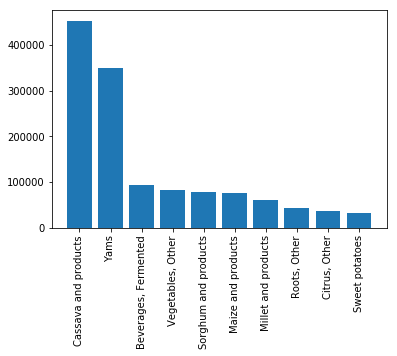

In [119]:
most_food = pd.DataFrame(nig_production.groupby(['Item'])['Value'].sum())

most_food_10=most_food.groupby('Item').sum().sort_values(by='Value', ascending=False).head(10)

most_food_10.index.name = 'Item'
most_food_10.reset_index(inplace = True)
most_food_10.head()

x  = most_food_10['Item']
y = most_food_10['Value']

xticks  = most_food_10['Item']
yticks = most_food_10['Value']

plt.xticks(rotation=90)

plt.bar(x,y)

## We produce cassava in Nigeria than any other Items in Nigeria

# Year in which Cassava and products is Produced most

<BarContainer object of 10 artists>

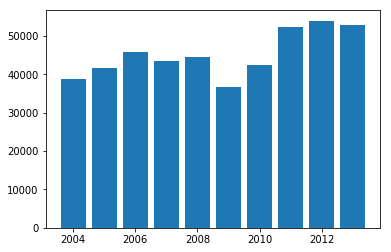

In [125]:
cassava = pd.DataFrame(nig_production[(nig_production['Item'] == 'Cassava and products')])

cassava

# cassava.index.name = 'Item'
# cassava.reset_index(inplace = True)
# cassava.head()

x  = cassava['Year']
y = cassava['Value']

plt.bar(x,y)

# Year  and Country in which rice is most Produced in Africa

## Year

<BarContainer object of 10 artists>

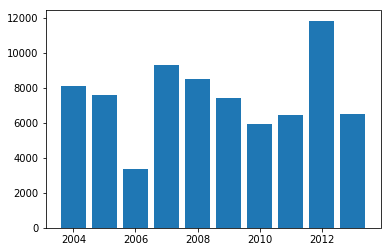

In [120]:
rice = production[(production['Item'] == 'Rice (Milled Equivalent)') & production['Value'] > 0]

rice_date = pd.DataFrame(rice.groupby(['Year'])['Value'].sum())

rice_date.index.name = 'Year'
rice_date.reset_index(inplace = True)
rice_date

x  = rice_date['Year']
y = rice_date['Value']

plt.bar(x,y)

## Top 10 Country

In [41]:
rice.head()

,Country,Item,Year,Value
590,Angola,Rice (Milled Equivalent),2004,9
592,Angola,Rice (Milled Equivalent),2006,3
593,Angola,Rice (Milled Equivalent),2007,3
597,Angola,Rice (Milled Equivalent),2011,15
599,Angola,Rice (Milled Equivalent),2013,25


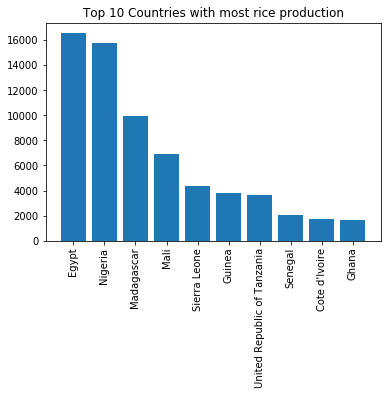

In [128]:
country = pd.DataFrame(rice.groupby(['Country'])['Value'].sum()).sort_values(by='Value', ascending=False).head(10)

country.index.name = 'Country'
country.reset_index(inplace = True)
country.head()

x  = country['Country']
y = country['Value']
plt.title('Top 10 Countries with most rice production')

plt.xticks(rotation=90)

plt.bar(x,y)
plt.show()

# Top 10 Item most produced in Africa 

In [130]:
production.groupby(['Item'])['Value'].sum().head()

Item
Alcohol, Non-Food            3652
Apples and products         21706
Aquatic Animals, Others        13
Aquatic Plants               1378
Bananas                    153785
Name: Value, dtype: int64

<BarContainer object of 10 artists>

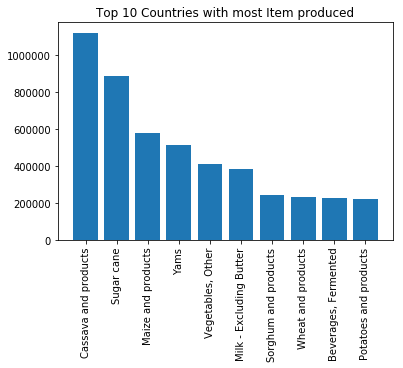

In [135]:
top_10_most_item = production.groupby(['Item']).sum().sort_values(by='Value', ascending=False).head(10)

top_10_most_item.index.name = 'Item'
top_10_most_item.reset_index(inplace = True)

plt.title('Top 10 Countries with most Item produced')

plt.xticks(rotation=90)
plt.bar(top_10_most_item['Item'], top_10_most_item['Value'])